In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso #penalises features, helps in selecting features
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [29]:
dataset=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

(1460, 81)


In [30]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In Data Analysis
* Missing Values
* All The Numerical Variables
* Distribution of the Numerical Variables
* Categorical Variables
* Cardinality of Categorical Variables
* Outliers
* Relationship between independent and dependent feature(SalePrice)

# Missing Values

In [32]:
missing_count = dataset.isnull().sum() #This is a pandas Series data structure
# As we have 81 feature, the names of all the features holding missing values are not clear

In [33]:
features_with_missing_values = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]

# printing feature name along with its null value count
for feature in features_with_missing_values:
    print(feature, " has ", missing_count[feature], " missing values")

LotFrontage  has  259  missing values
Alley  has  1369  missing values
MasVnrType  has  8  missing values
MasVnrArea  has  8  missing values
BsmtQual  has  37  missing values
BsmtCond  has  37  missing values
BsmtExposure  has  38  missing values
BsmtFinType1  has  37  missing values
BsmtFinType2  has  38  missing values
FireplaceQu  has  690  missing values
GarageType  has  81  missing values
GarageYrBlt  has  81  missing values
GarageFinish  has  81  missing values
GarageQual  has  81  missing values
GarageCond  has  81  missing values
PoolQC  has  1453  missing values
Fence  has  1179  missing values
MiscFeature  has  1406  missing values


### Finding relationship between columns with missing values and target variable (SalePrice).
#### This will help us to discover if there is any relationship between missing values  and the SalePrice.
#### Observation: For some features, the mean price for "missing value" is higher than "legit values"

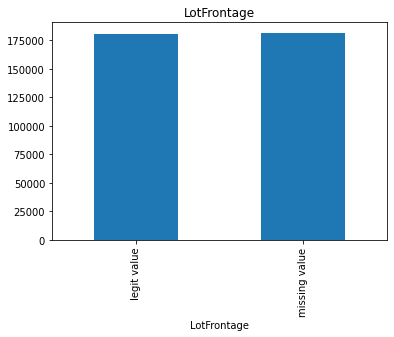

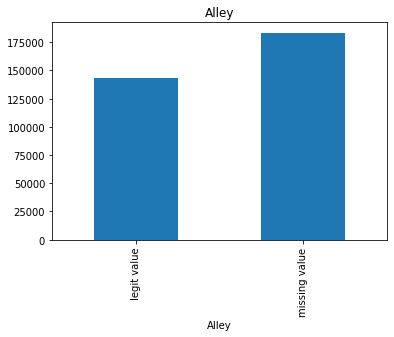

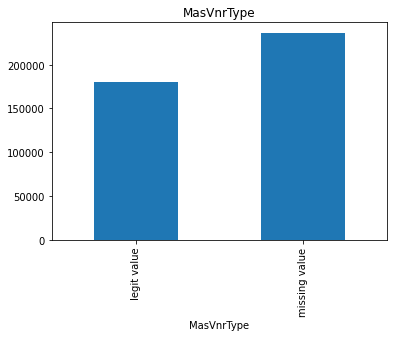

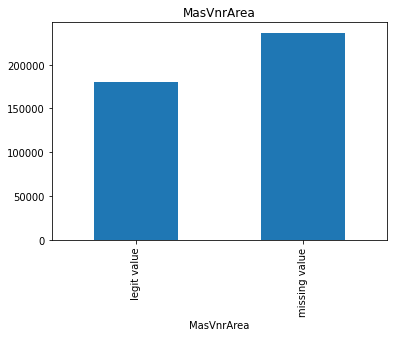

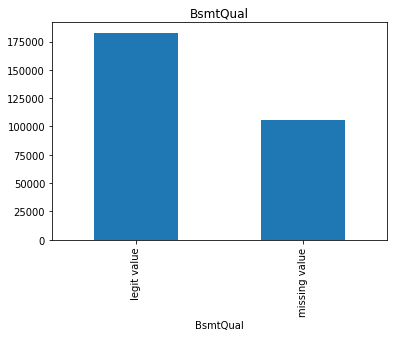

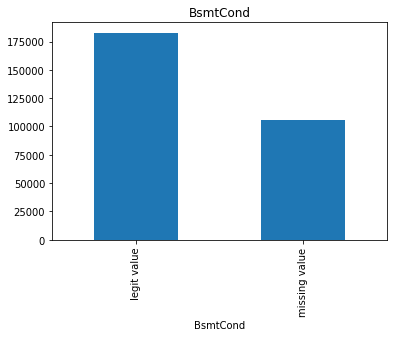

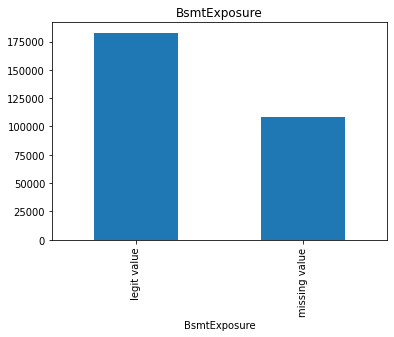

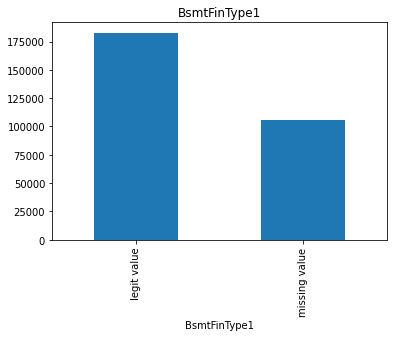

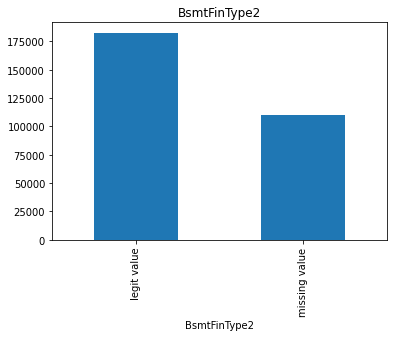

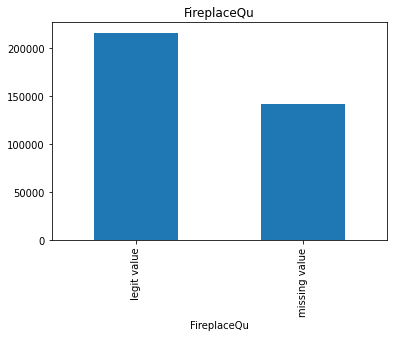

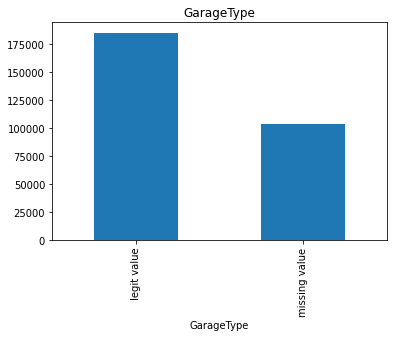

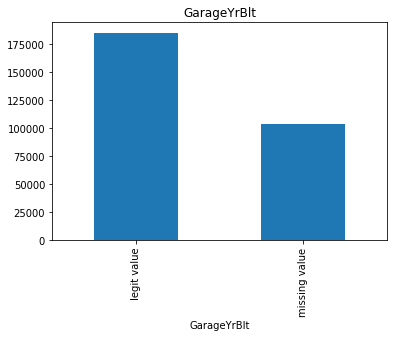

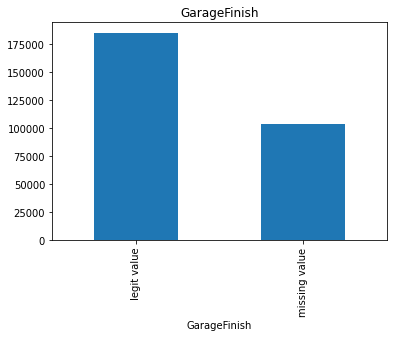

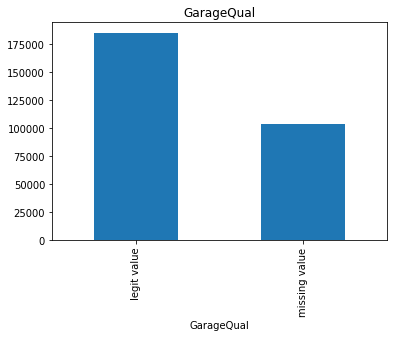

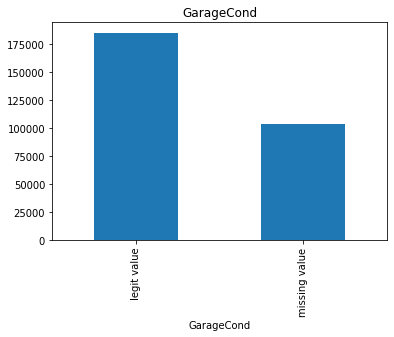

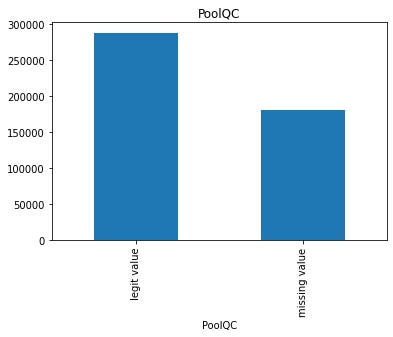

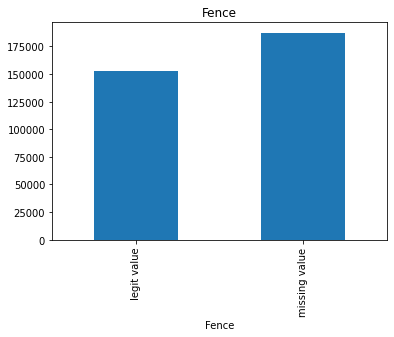

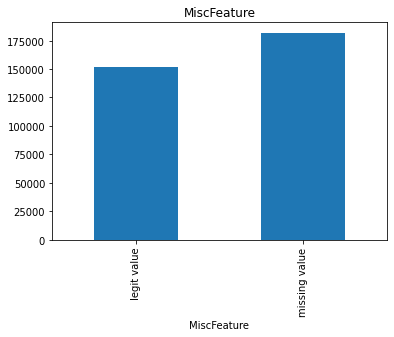

In [34]:
data = dataset.copy() # temporary dataset

for feature in features_with_missing_values:
    data[feature] = np.where(data[feature].isnull(), "missing value", "legit value")

    # mean of Sale Price, for each category, missing and legit
    data.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.title(feature)
    plt.show()



# Numeric Variables

In [35]:
# printing the dtype for each column
for feature in dataset.columns:
    print(feature, " -- ", dataset[feature].dtype)

Id  --  int64
MSSubClass  --  int64
MSZoning  --  object
LotFrontage  --  float64
LotArea  --  int64
Street  --  object
Alley  --  object
LotShape  --  object
LandContour  --  object
Utilities  --  object
LotConfig  --  object
LandSlope  --  object
Neighborhood  --  object
Condition1  --  object
Condition2  --  object
BldgType  --  object
HouseStyle  --  object
OverallQual  --  int64
OverallCond  --  int64
YearBuilt  --  int64
YearRemodAdd  --  int64
RoofStyle  --  object
RoofMatl  --  object
Exterior1st  --  object
Exterior2nd  --  object
MasVnrType  --  object
MasVnrArea  --  float64
ExterQual  --  object
ExterCond  --  object
Foundation  --  object
BsmtQual  --  object
BsmtCond  --  object
BsmtExposure  --  object
BsmtFinType1  --  object
BsmtFinSF1  --  int64
BsmtFinType2  --  object
BsmtFinSF2  --  int64
BsmtUnfSF  --  int64
TotalBsmtSF  --  int64
Heating  --  object
HeatingQC  --  object
CentralAir  --  object
Electrical  --  object
1stFlrSF  --  int64
2ndFlrSF  --  int64
LowQual

In [36]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype in ['int64', 'float64']]

print('the number of numerical columns == ', len(numerical_features))

the number of numerical columns ==  38


### Temporal Variables (eg: Datetime Variable)
#### we generally extract info like no. of years or no. of days. E.g., difference between year the house was sold and the house was built

In [37]:
# list of variables that contain year information
year_numerical_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_numerical_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [38]:
# let's explore the unique contents of these year variables
for feature in year_numerical_feature:
    print(feature, len(dataset[feature].unique()))
    print(feature, dataset[feature].unique())
    print()

YearBuilt 112
YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd 61
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt 98
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2

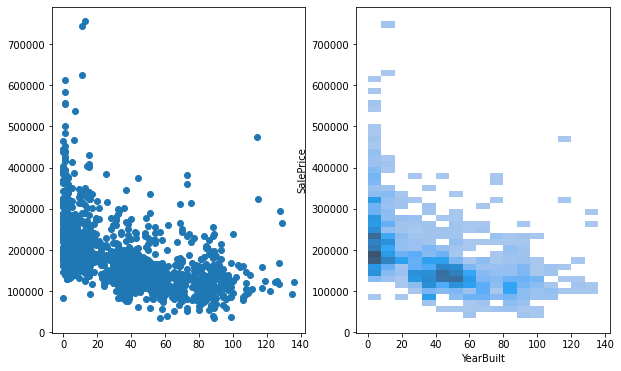

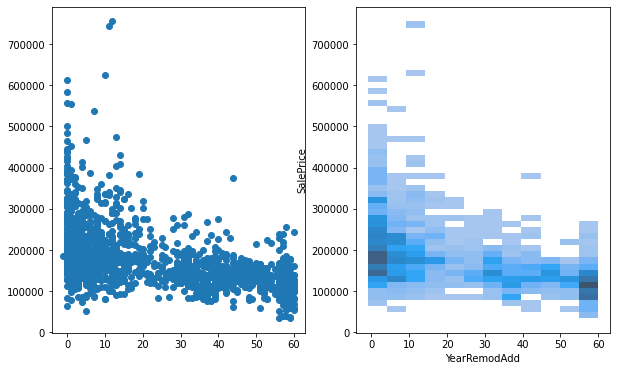

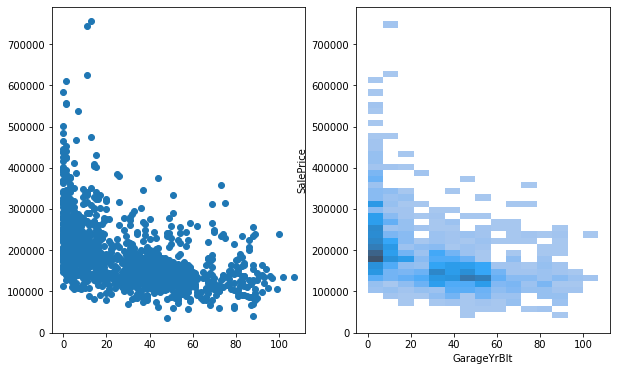

In [39]:
# We will now find the difference between all year features with YrSold feature, and then compare it  with SalePrice 
# to find if any interesting pattern exists or not
import seaborn as sns

data = dataset.copy() #temporary dataset

for feature in year_numerical_feature:
    if feature not in ['YrSold']:
        data[feature] = data['YrSold'] - data[feature]
        
        plt.figure(figsize=(10,6))
        
        plt.subplot(1,2,1)
        plt.scatter(data[feature], data['SalePrice'])

        plt.subplot(1,2,2)
        sns.histplot(data=data, x=feature, y='SalePrice', kde=False)
        
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

### Discrete Numerical variables
#### features which have less than 25 unique values, and feature is not in year_numerical features, and definitely not the Id feature

In [40]:
discrete_numerical_features = [feature for feature in numerical_features if len(dataset[feature].unique()) < 25 and feature not in year_numerical_feature + ['Id']]

discrete_numerical_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

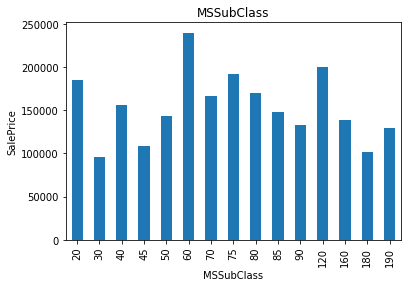

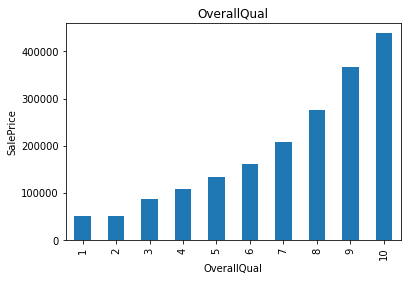

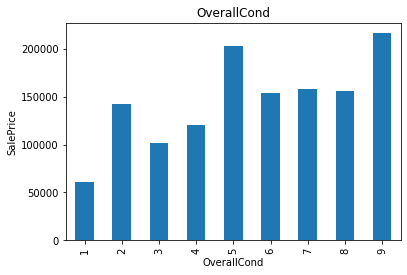

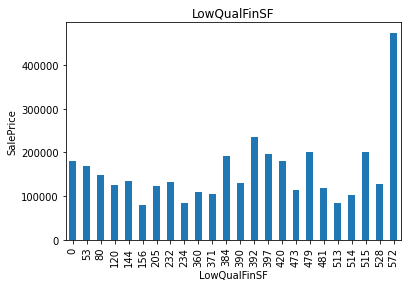

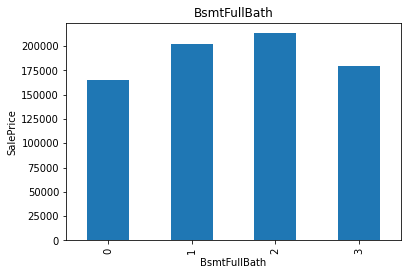

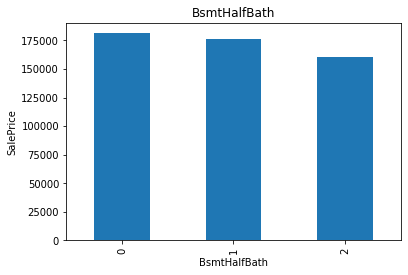

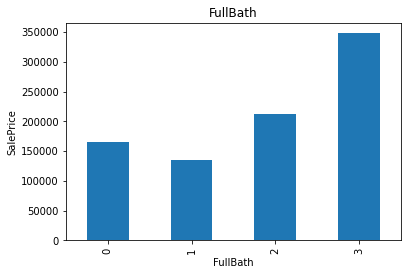

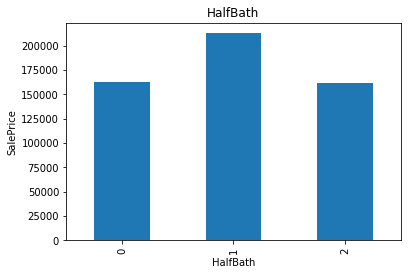

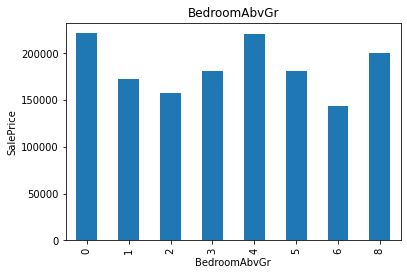

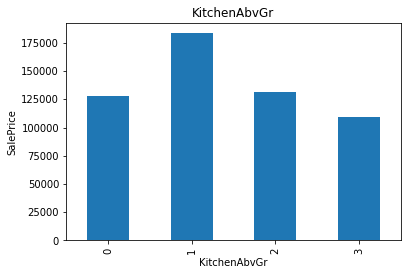

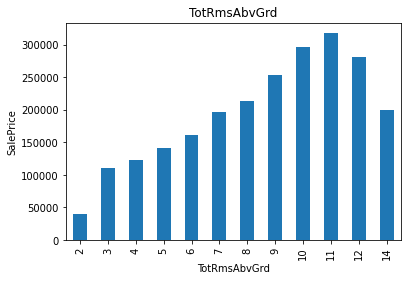

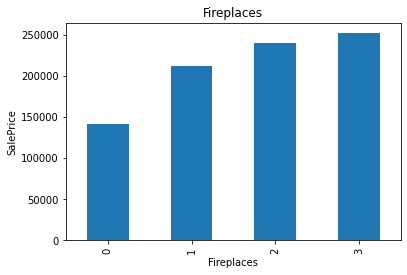

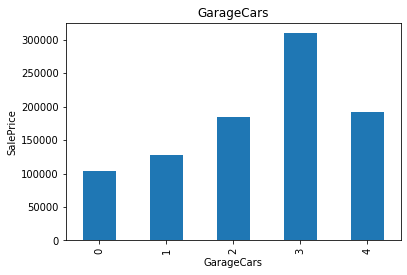

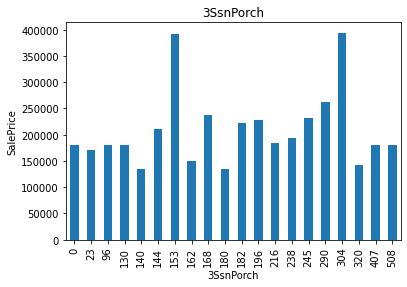

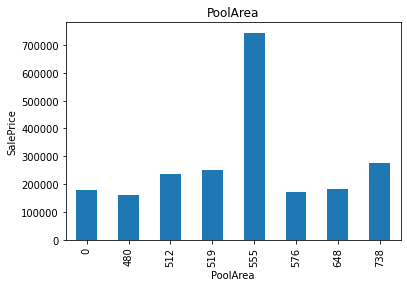

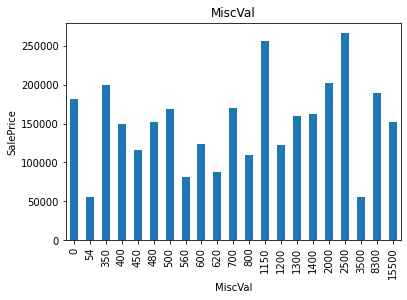

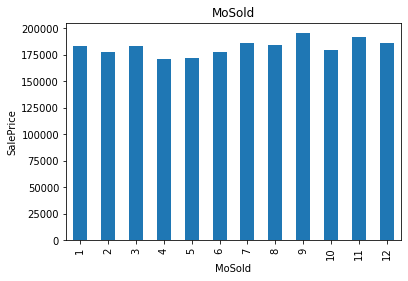

In [41]:
## Lets see if there is some realtionship between discrete numerical features and Sale PRice
data=dataset.copy()

for feature in discrete_numerical_features:    
    data.groupby(feature)['SalePrice'].mean().plot.bar() #using mean of data 
    
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()
    
# Observation: Clearly visible, that there exists relationship between discrete numerical variable and target SalePrice

### Continuous Numerical Features

In [42]:
continuous_numerical_feature = [feature for feature in numerical_features if feature not in discrete_numerical_features + year_numerical_feature + ['Id']]
len(continuous_numerical_feature)

16

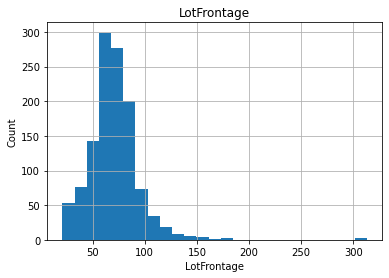

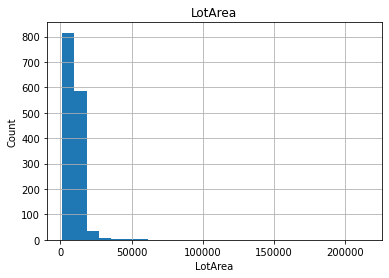

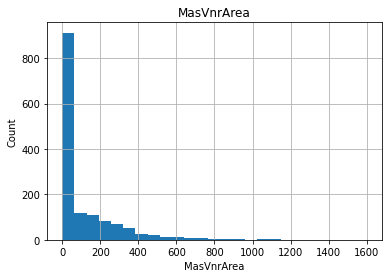

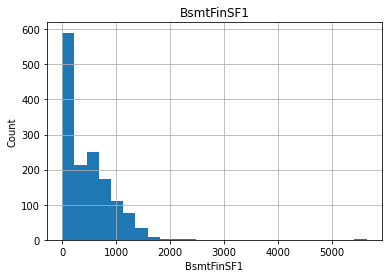

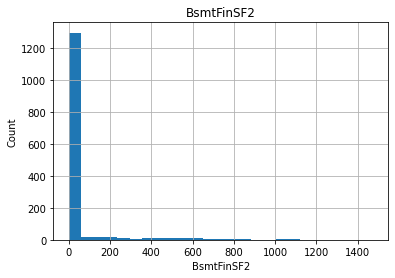

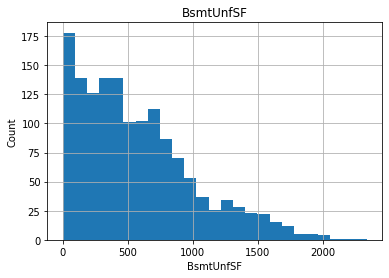

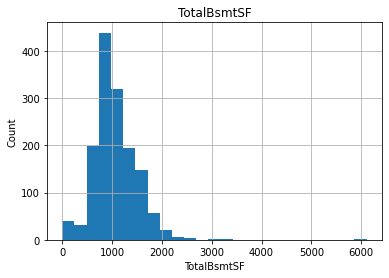

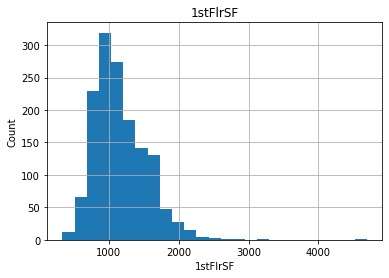

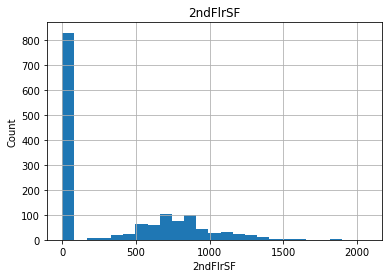

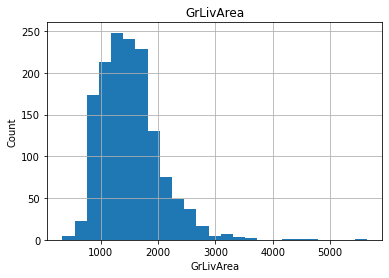

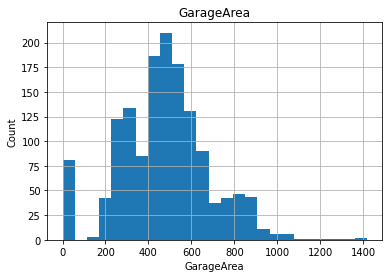

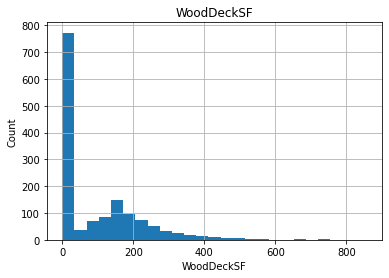

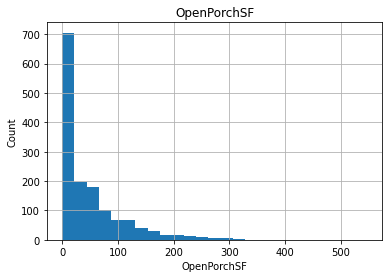

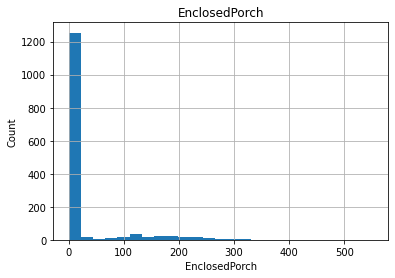

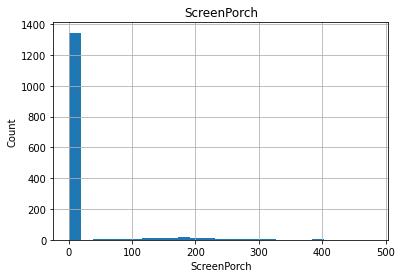

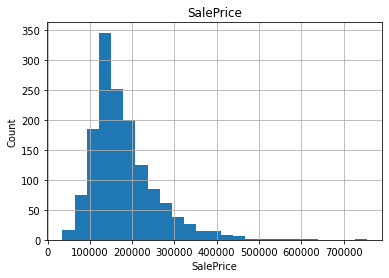

In [43]:
## Lets analyse the continuous values by creating histograms to understand the distribution
data = dataset.copy()

for feature in continuous_numerical_feature:
    data[feature].hist(bins=25)
    
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


### Outliers in continuous numerical features

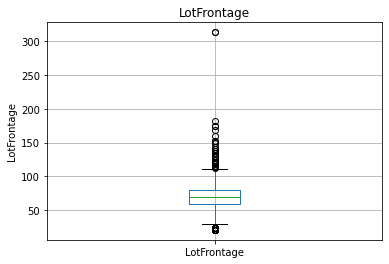

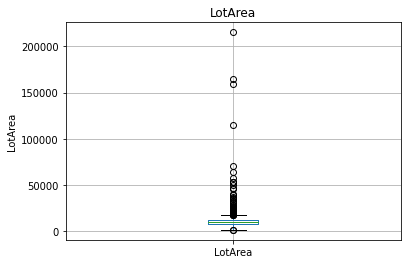

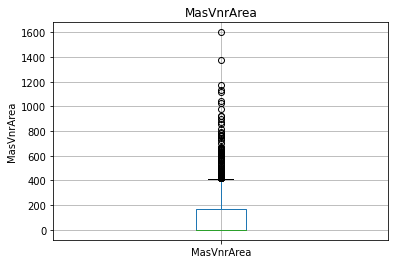

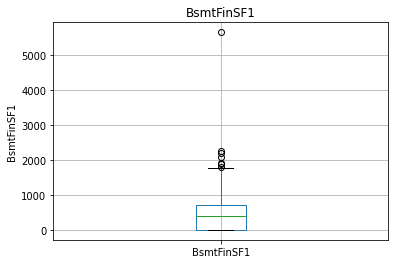

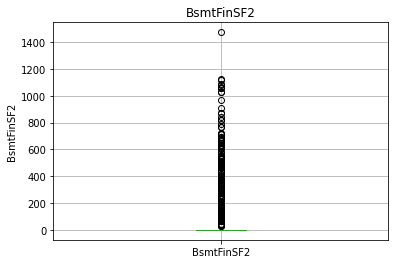

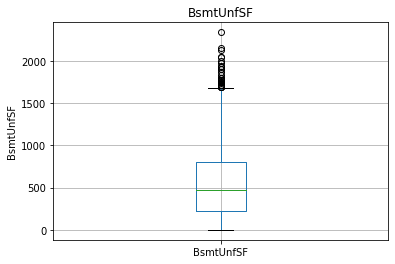

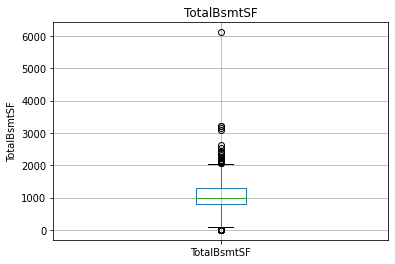

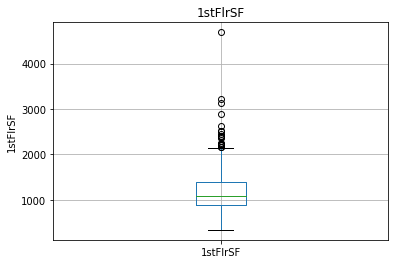

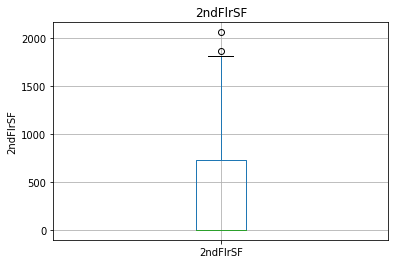

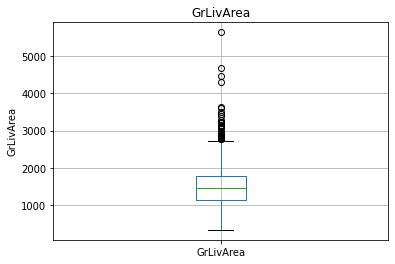

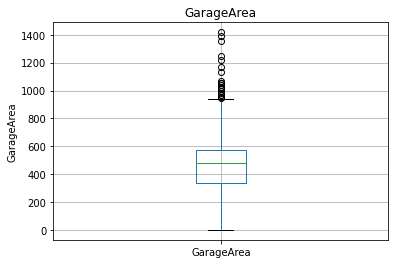

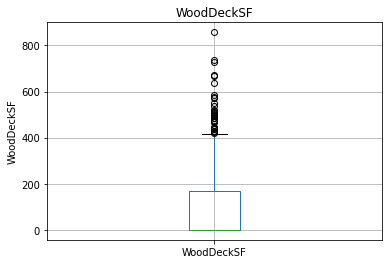

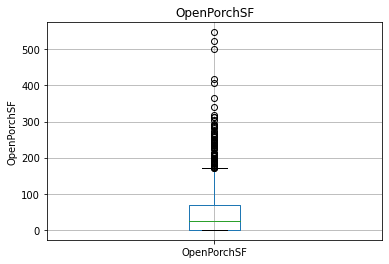

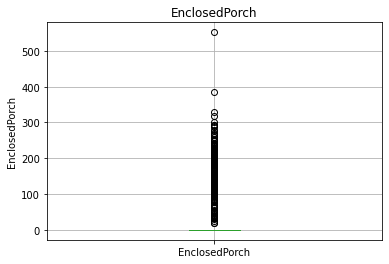

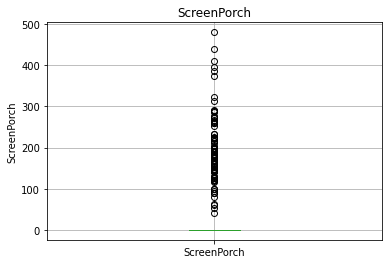

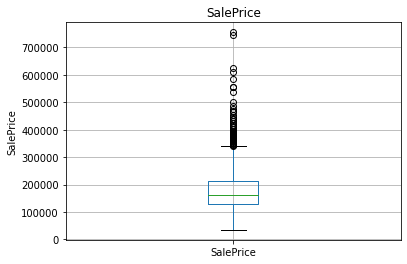

In [44]:
for feature in continuous_numerical_feature:
    dataset.boxplot(column = feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()
        
# clearly we can see presence of outliers for each continuous numerical feature  

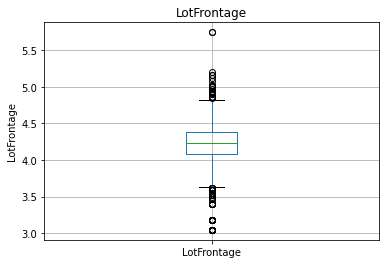

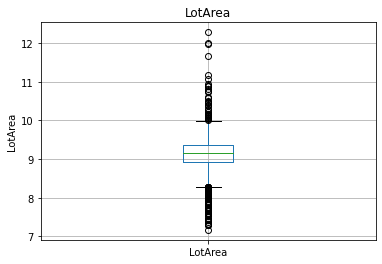

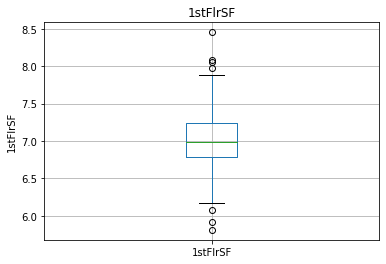

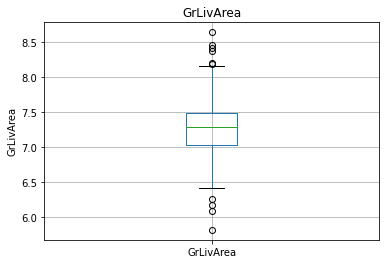

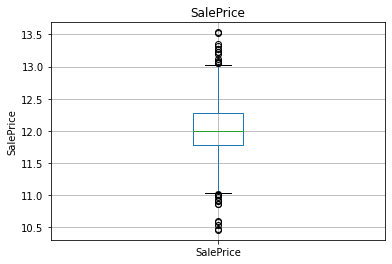

In [45]:
# let us use log transformation to get a better picture of outliers
data = dataset.copy()

for feature in continuous_numerical_feature:

    if 0 in data[feature].unique():
        continue #cause log tranformation of 0 will be infinite
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Categorical Features

In [46]:
# finding columns with categorical features
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes in ['object']]

categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [47]:
# finding how many categories each categorical feature holds

for feature in categorical_features:
    print('The feature {} has {} many categories'.format(feature, len(dataset[feature].unique())))

The feature MSZoning has 5 many categories
The feature Street has 2 many categories
The feature Alley has 3 many categories
The feature LotShape has 4 many categories
The feature LandContour has 4 many categories
The feature Utilities has 2 many categories
The feature LotConfig has 5 many categories
The feature LandSlope has 3 many categories
The feature Neighborhood has 25 many categories
The feature Condition1 has 9 many categories
The feature Condition2 has 8 many categories
The feature BldgType has 5 many categories
The feature HouseStyle has 8 many categories
The feature RoofStyle has 6 many categories
The feature RoofMatl has 8 many categories
The feature Exterior1st has 15 many categories
The feature Exterior2nd has 16 many categories
The feature MasVnrType has 5 many categories
The feature ExterQual has 4 many categories
The feature ExterCond has 5 many categories
The feature Foundation has 6 many categories
The feature BsmtQual has 5 many categories
The feature BsmtCond has 5 

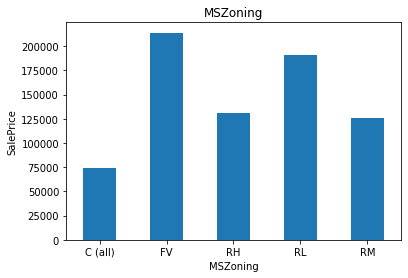

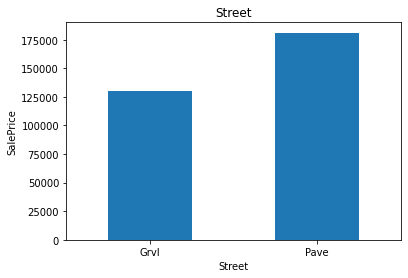

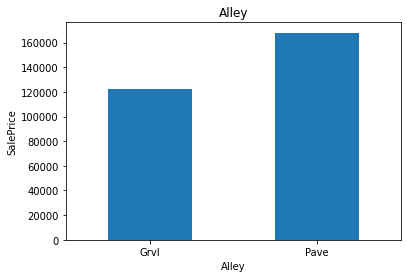

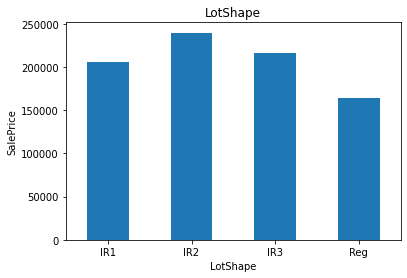

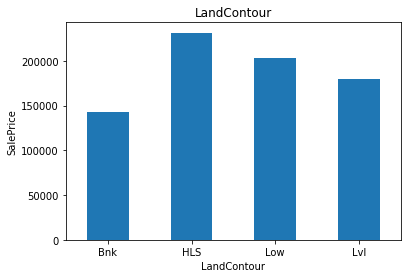

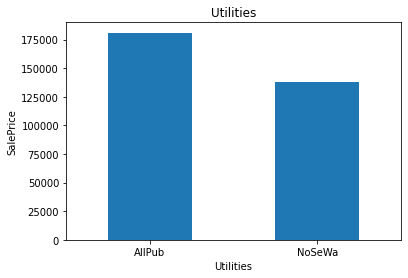

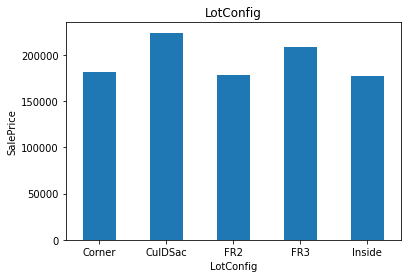

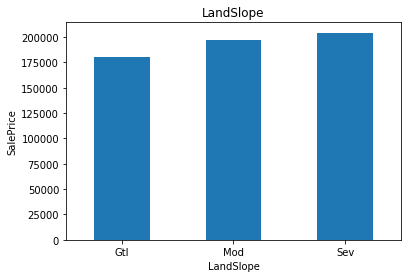

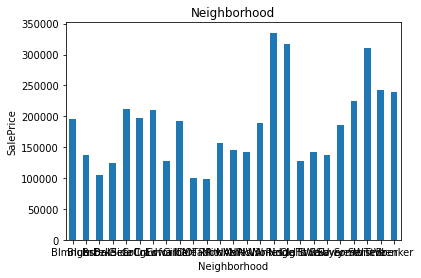

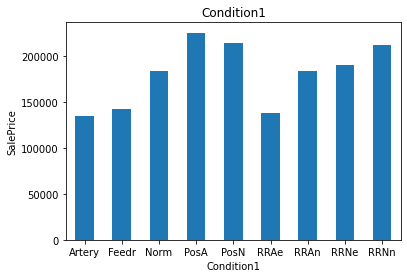

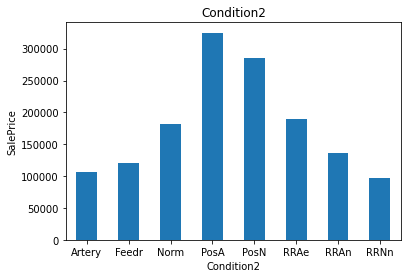

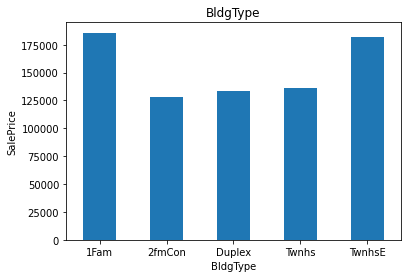

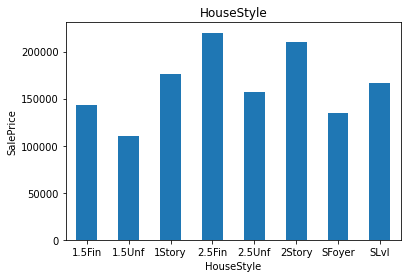

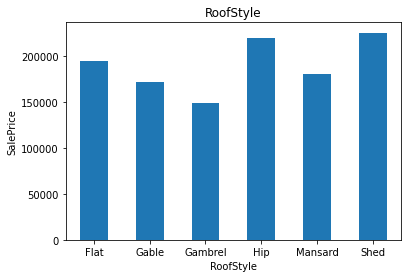

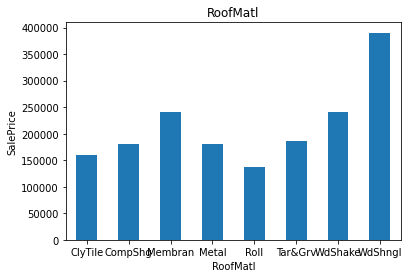

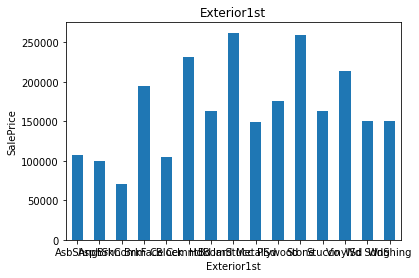

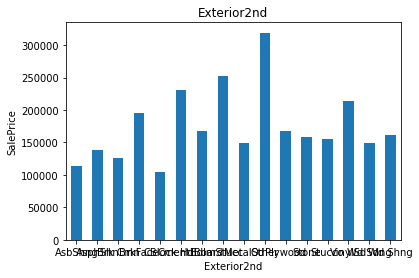

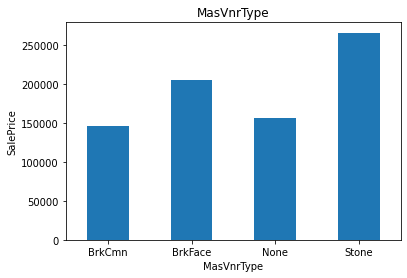

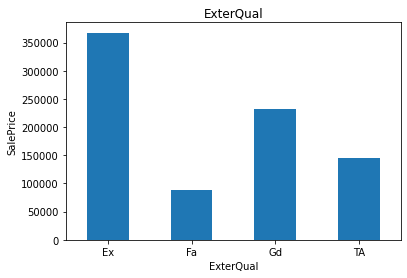

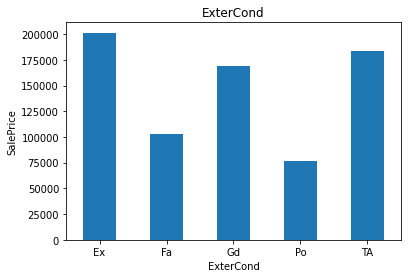

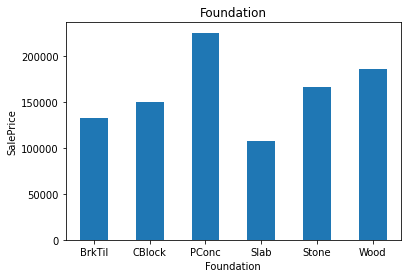

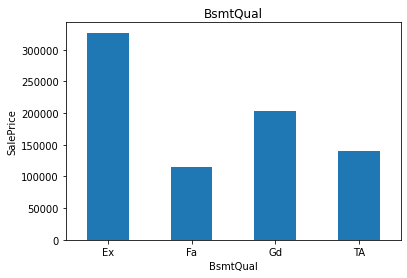

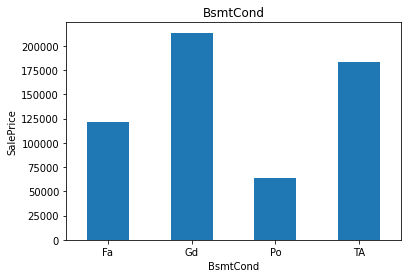

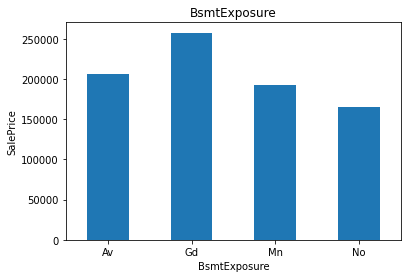

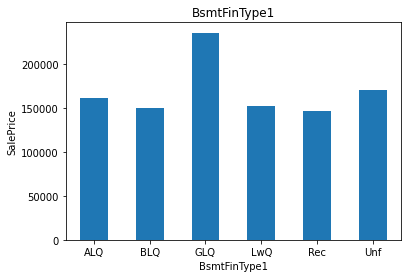

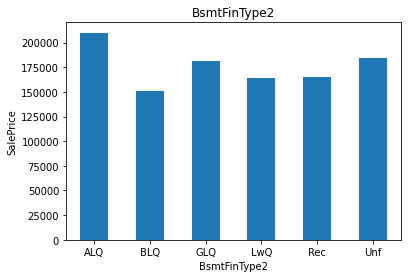

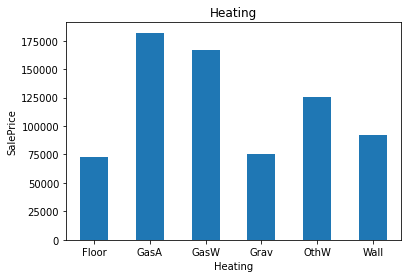

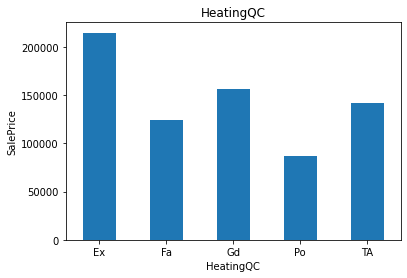

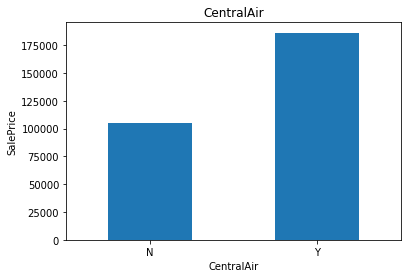

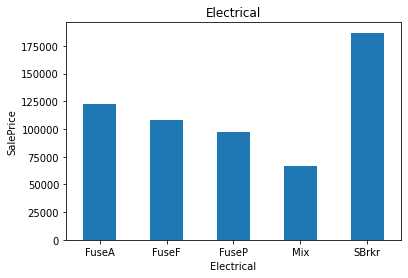

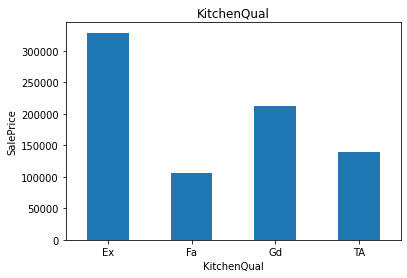

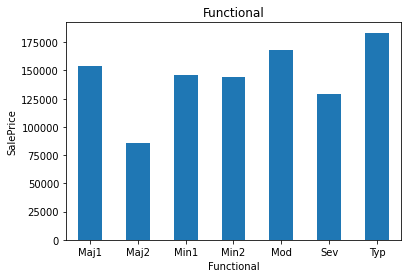

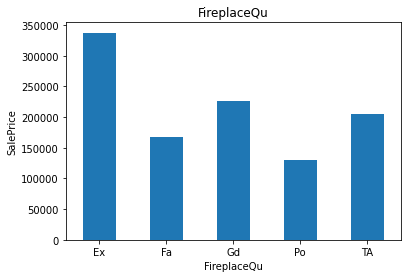

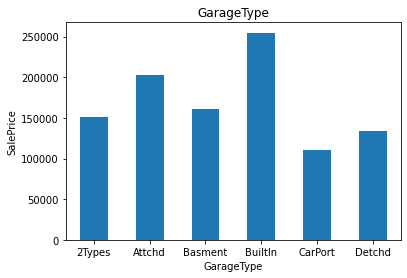

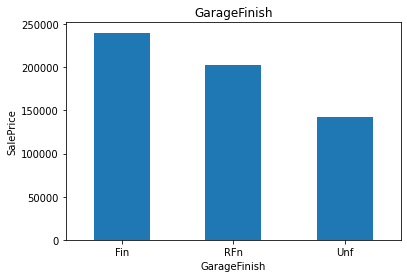

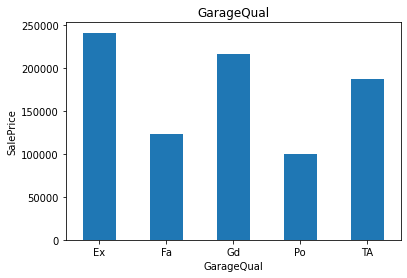

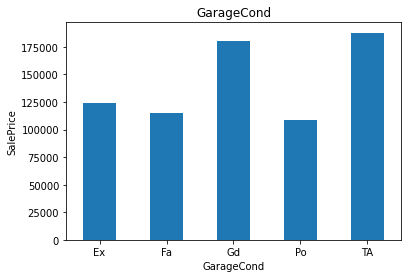

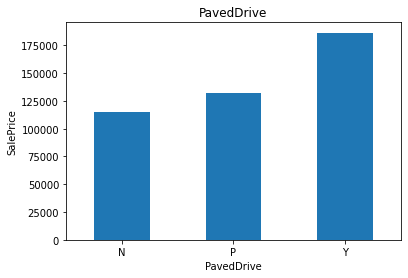

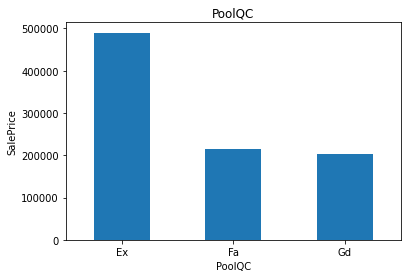

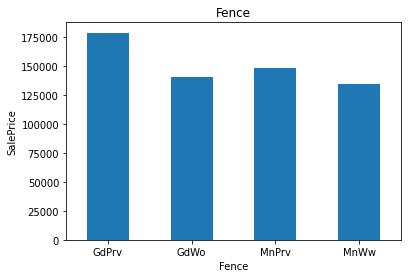

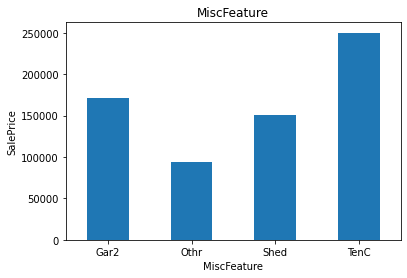

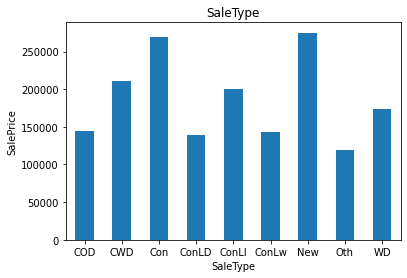

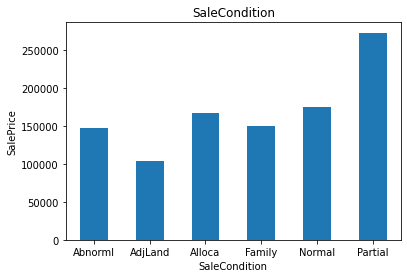

In [48]:
## visualizaiton
# Finding out how the categories within each categorical feature is dependent on SalePrice
data = dataset.copy()

# plotting barplots for mean SalePrice in each category
for feature in categorical_features:
    data.groupby(feature)['SalePrice'].mean().plot.bar(rot=0)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()
    
# there is a clear relationship among categorical features and mean prices

# Featue Engineering

* Steps involved in  Feature Engineering
1. Handling Missing values
2. Handling Temporal variables
3. Categorical feature encoding
4. Feature Scaling: Standarise the values of the variables to the same range

In [49]:
# printing head of dataset
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
# splitting dependent and independent variables
X = dataset.drop(['Id', 'SalePrice'], axis=1)
y = dataset.SalePrice

## Splitting the data beforehand to avoid any train-test data leak

In [51]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, random_state=1, test_size=0.1)

print(x_train.shape)
print(x_val.shape)

(1314, 79)
(146, 79)


### Handling Missing Values

#### Handing categorical missing values

In [52]:
# Handling missing values for categorical features 

cat_features_with_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum() >= 1 and dataset[feature].dtypes in ['object']]
x_train[cat_features_with_nan].isnull().sum()
# replacing missing categorical features with 'Missing' string

def replace_cat_features(dataset, features_with_nan):
    data = dataset.copy()
    data[features_with_nan] = data[features_with_nan].fillna('Missing')
    return data

x_train = replace_cat_features(x_train, cat_features_with_nan)
x_val = replace_cat_features(x_val, cat_features_with_nan)


In [53]:
x_train[cat_features_with_nan].isnull().sum()


Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [54]:
x_val[cat_features_with_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

#### Handling numerical missing values

In [55]:
# finding columns with numerical values and have missing values

numerical_with_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum() >= 1 and dataset[feature].dtypes in ['int64', 'float64']]

len(numerical_with_nan)

3

In [56]:
# any missing numerical values in train data?
train_num_nan = x_train[numerical_with_nan].isnull().sum()
for col in train_num_nan.index:
    print('{}    {}'.format(col, train_num_nan[col]))

LotFrontage    233
MasVnrArea    8
GarageYrBlt    73


In [57]:
# Any missing numerical values in test data?
val_num_nan = x_val[numerical_with_nan].isnull().sum()
for col in val_num_nan.index:
    print('{}    {}'.format(col, val_num_nan[col]))

LotFrontage    26
MasVnrArea    0
GarageYrBlt    8


In [58]:
# Replacing the numerical Missing values with "median", as all the numerical features have outliers.

for feature in numerical_with_nan:
# creating a new feature, to capture the rows that have nan values. If nan, then we will assign 0
    if train_num_nan[feature] > 0:
#         x_train[feature+'nan'] = np.where(x_train[feature].isnull(), 0, 1)
        x_train[feature].fillna(x_train[feature].median(), inplace=True)

    if val_num_nan[feature] > 0:
#         x_val[feature+'nan'] = np.where(x_val[feature].isnull(), 0, 1)
        x_val[feature].fillna(x_val[feature].median(), inplace=True)

In [59]:
x_train[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [60]:
x_val[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

#### Handling Temporal features (date - time variable)
##### Measuring time distance ==> subtracting each temporal variable from "YearSold" feature

In [61]:
year_numerical_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [62]:
year_numerical_feature.remove('YrSold')

# replacing temporal variable with time distance
for feature in year_numerical_feature:
    x_train[feature] = x_train['YrSold'] - x_train[feature]
    x_val[feature] = x_val['YrSold'] - x_val[feature]

In [63]:
x_train[year_numerical_feature].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
418,67,57,67.0
782,8,7,8.0
1338,4,4,4.0
931,44,44,44.0
780,12,11,12.0


In [64]:
continuous_numerical_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [65]:
### Log Transformation - Numerical Variables
#### Since numerical variable are skewed we will perform log normal transformation

# # let us use log transformation 
# continuous_numerical_feature.remove('SalePrice')
# for feature in continuous_numerical_feature:
#     # handling training data
#     if 0 in x_train[feature].unique():
#         continue #cause log tranformation of 0 will be infinite
#     else:
#         x_train[feature] = np.log(data[feature])
    
#     # handling test data
#     if 0 in x_val[feature].unique():
#         continue
#     else:
#         x_val[feature] = np.log(data[feature])

### Encoding the Categorical Features

In [66]:
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
418,50,RL,60.0,8160,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,5,6,67,57,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,312,Unf,0,444,756,GasA,Fa,N,FuseF,756,378,0,1134,1,0,1,1,3,1,TA,7,Typ,0,Missing,Detchd,67.0,Unf,1,240,TA,TA,P,0,0,0,0,0,0,Missing,Missing,Missing,0,4,2007,WD,AdjLand
782,20,RL,67.0,16285,Pave,Missing,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,8,7,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1413,1413,GasA,Ex,Y,SBrkr,1430,0,0,1430,0,0,2,0,3,1,Gd,6,Typ,0,Missing,Attchd,8.0,RFn,2,605,TA,TA,Y,0,33,0,0,0,0,Missing,Missing,Missing,0,6,2009,WD,Normal
1338,60,RL,95.0,13450,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,4,4,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,700,Unf,0,216,916,GasA,Ex,Y,SBrkr,920,941,0,1861,1,0,2,1,3,1,Gd,8,Typ,0,Missing,BuiltIn,4.0,RFn,2,492,TA,TA,Y,146,91,0,0,0,0,Missing,Missing,Missing,0,6,2006,WD,Normal
931,20,RL,70.0,9100,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,44,44,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,338,Rec,466,121,925,GasA,Ex,Y,SBrkr,925,0,0,925,0,1,1,0,2,1,TA,5,Typ,0,Missing,Detchd,44.0,Unf,1,429,TA,TA,Y,0,0,0,0,0,0,Missing,GdWo,Missing,0,7,2009,WD,Normal
780,20,RL,63.0,7875,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,12,11,Gable,CompShg,HdBoard,HdBoard,BrkFace,38.0,TA,TA,PConc,Gd,Gd,No,Unf,0,Unf,0,1237,1237,GasA,Gd,Y,SBrkr,1253,0,0,1253,0,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,12.0,Fin,2,402,TA,TA,Y,220,21,0,0,0,0,Missing,Missing,Missing,0,6,2007,WD,Normal


In [67]:
# we will discard categories not seen during fit
# `handle_unknown` must be 'error' when the drop parameter is specified, as both would create categories that are all zero.

# x_train_cat_encoded = pd.get_dummies(x_train, columns = categorical_features)
# from sklearn.preprocessing import OneHotEncoder

# Applying one-hot encoder to each categorical column
cat_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_encoded = pd.DataFrame(cat_encoder.fit_transform(x_train[categorical_features]))
val_encoded = pd.DataFrame(cat_encoder.transform(x_val[categorical_features]))


# putting back the lost indexes due to one-hot encoding
train_encoded.index = x_train.index
val_encoded.index = x_val.index


# removing categorical columns from original x_train and x_val
num_x_train = x_train.drop(categorical_features, axis=1)
num_x_val = x_val.drop(categorical_features, axis=1)


# adding one-hot encoded columns and numerical features
encoded_x_train = pd.concat([num_x_train, train_encoded], axis=1)
encoded_x_val = pd.concat([num_x_val, val_encoded], axis=1)

In [68]:
encoded_x_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266
418,50,60.0,8160,5,6,67,57,0.0,312,0,444,756,756,378,0,1134,1,0,1,1,3,1,7,0,67.0,1,240,0,0,0,0,0,0,0,4,2007,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
782,20,67.0,16285,7,5,8,7,0.0,0,0,1413,1413,1430,0,0,1430,0,0,2,0,3,1,6,0,8.0,2,605,0,33,0,0,0,0,0,6,2009,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1338,60,95.0,13450,7,5,4,4,0.0,700,0,216,916,920,941,0,1861,1,0,2,1,3,1,8,0,4.0,2,492,146,91,0,0,0,0,0,6,2006,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [69]:
encoded_x_val.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266
258,60,80.0,12435,7,5,7,7,172.0,361,0,602,963,963,829,0,1792,0,0,2,1,3,1,7,1,7.0,2,564,0,96,0,245,0,0,0,5,2008,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
267,75,60.0,8400,5,8,69,11,0.0,378,0,342,720,1052,720,420,2192,0,0,2,1,4,1,8,1,69.0,1,240,262,24,0,0,0,0,0,7,2008,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
288,20,68.0,9819,5,5,43,43,31.0,450,0,432,882,900,0,0,900,0,0,1,0,3,1,5,0,40.0,1,280,0,0,0,0,0,0,0,2,2010,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [70]:
encoded_x_train.shape

(1314, 303)

In [71]:
encoded_x_val.shape

(146, 303)

### Feature Scaling: using min_max_scaler (normalisation)

In [72]:
scaler_cols = encoded_x_train.columns

In [73]:
# from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# transforming train data
x_train_encoded_scaled = pd.DataFrame(scaler.fit_transform(encoded_x_train), columns = scaler_cols)

# transforming val data
x_val_encoded_scaled = pd.DataFrame(scaler.transform(encoded_x_val), columns = scaler_cols)

In [74]:
x_train_encoded_scaled.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266
0,0.176471,0.133562,0.032064,0.444444,0.571429,0.492647,0.950820,0.00000,0.055280,0.000000,0.190068,0.123732,0.096833,0.183051,0.0,0.150716,0.333333,0.0,0.333333,0.5,0.375,0.5,0.416667,0.000000,0.626168,0.25,0.169252,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.272727,0.25,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000000,0.157534,0.070041,0.666667,0.428571,0.058824,0.131148,0.00000,0.000000,0.000000,0.604880,0.231260,0.251492,0.000000,0.0,0.206481,0.000000,0.0,0.666667,0.0,0.375,0.5,0.333333,0.000000,0.074766,0.50,0.426657,0.000000,0.060329,0.0,0.0,0.0,0.0,0.0,0.454545,0.75,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0

### Feature Selection
#### The bigger the alpha for Lasso, less features gets selected
#### SelectFromModel selects features whose coefficients are non-zero

In [75]:
from sklearn.linear_model import Lasso #penalises features, helps in selecting features
from sklearn.feature_selection import SelectFromModel

# feature selection from training data
feature_sel_x_train = SelectFromModel(Lasso(alpha = 0.01, random_state=1, max_iter=10000000)) # I had to increate the max_iter from 1000
feature_sel_x_train.fit(x_train_encoded_scaled, y_train)

SelectFromModel(estimator=Lasso(alpha=0.01, max_iter=10000000, random_state=1))

In [76]:
# a mask, or integer index, of the features selected
feature_sel_x_train.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [77]:
# Let's print the selected features
selected_features = x_train_encoded_scaled.columns[(feature_sel_x_train.get_support())]
selected_features


Index([  'MSSubClass',  'LotFrontage',      'LotArea',  'OverallQual',
        'OverallCond',    'YearBuilt', 'YearRemodAdd',   'MasVnrArea',
         'BsmtFinSF1',   'BsmtFinSF2',
       ...
                  256,            257,            258,            260,
                  261,            262,            263,            264,
                  265,            266],
      dtype='object', length=278)

In [78]:
# a comparison on features selected
print('total features: {}'.format(x_train_encoded_scaled.shape[1]))
print('selected features: {}'.format(len(selected_features)))

total features: 303
selected features: 278


In [79]:
x_train_final = x_train_encoded_scaled[selected_features]
x_val_final = x_val_encoded_scaled[selected_features]

### Model Creation for training - validation data

In [80]:
from scipy.stats import uniform, randint
import xgboost as xgb

params = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators": [100, 120, 135, 150, 165, 200] }

xgb_model = xgb.XGBRegressor()


# from sklearn.model_selection import GridSearchCV

# regressor = GridSearchCV(xgb_model, param_grid = params, n_jobs =-1)
# Grid search CV was taking a lot of time

from sklearn.model_selection import RandomizedSearchCV
regressor = RandomizedSearchCV(xgb_model, param_distributions = params, random_state=1, n_iter=200, cv=3, verbose=1, 
                   n_jobs=1, return_train_score=True)

regressor.fit(x_train_final, y_train)

regressor.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  7.1min finished


{'n_estimators': 200,
 'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.3}

In [81]:
xgb_model = xgb.XGBRegressor(n_estimators = 200,
 min_child_weight = 5,
 max_depth = 5,
 learning_rate = 0.1,
 gamma = 0.2,
 colsample_bytree = 0.3)

xgb_model.fit(x_train_final, y_train)

# printing the metrics
from sklearn.metrics import mean_absolute_error

y_predict = xgb_model.predict(x_val_final)
print(mean_absolute_error(y_val, y_predict))

13969.207352311643


# Model builidng - Train and Test data

In [82]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [83]:
print('train-size = {} \ntest-size = {}'.format(train.shape, test.shape))

train-size = (1460, 81) 
test-size = (1459, 80)


In [84]:
# splitting train data into dependent and indenpendent features
X = train.drop('SalePrice', axis=1)
y = train.SalePrice

In [85]:
y.isnull().sum() #no missing values of target variable

0

#### Handing categorical missing values

In [86]:
# Handling missing values for categorical features 
# replacing missing categorical features with 'Missing' string
def replace_cat_features(dataset):
    cat_features_with_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum() >= 1 and dataset[feature].dtypes in ['object']]
    
    data = dataset.copy()
    data[cat_features_with_nan] = data[cat_features_with_nan].fillna('Missing')
    return data

X = replace_cat_features(X)
test = replace_cat_features(test)

#### Handling numeric missing values

In [87]:
def replace_num_features(dataset):
    numerical_with_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum() >= 1 and dataset[feature].dtypes in ['int64', 'float64']]
    # Replacing the numerical Missing values with "median", as all the numerical features have outliers.
    data = dataset.copy()
    
    for feature in numerical_with_nan:
        data[feature].fillna(data[feature].median(), inplace=True)
    
    return data

X = replace_num_features(X)
test = replace_num_features(test)


#### Handling Temporal features (date - time variable)
##### Measuring time distance ==> subtracting each temporal variable from "YearSold" feature

In [88]:
year_numerical_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

In [89]:
# replacing temporal variable with time distance
def replace_temporal_features(dataset):
    data = dataset.copy()
    
    for feature in year_numerical_feature:
        data[feature] = data['YrSold'] - data[feature]
    
    return data

X = replace_temporal_features(X)
test = replace_temporal_features(test)

### Encoding Categorical Features

In [90]:
categorical_features = [feature for feature in train.columns if dataset[feature].dtypes in ['object']]
len(categorical_features)

43

In [91]:
# we will discard categories not seen during fit
# `handle_unknown` must be 'error' when the drop parameter is specified, as both would create categories that are all zero.

# Applying one-hot encoder to each categorical column
cat_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_encoded = pd.DataFrame(cat_encoder.fit_transform(X[categorical_features]), index = train.index)
test_encoded = pd.DataFrame(cat_encoder.transform(test[categorical_features]), index = test.index)


# removing categorical columns from original x_train and x_val
num_train = X.drop(categorical_features, axis=1)
num_test = test.drop(categorical_features, axis=1)


# adding one-hot encoded columns and numerical features
encoded_train = pd.concat([num_train, train_encoded], axis=1)
encoded_test = pd.concat([num_test, test_encoded], axis=1)

In [92]:
print(encoded_train.shape)
print(encoded_test.shape)

(1460, 305)
(1459, 305)


### Feature Scaling: using min-max scaler (Normalisation)

In [93]:
scaler_cols = encoded_train.columns

scaler = MinMaxScaler()
# transforming train data
train_encoded_scaled = pd.DataFrame(scaler.fit_transform(encoded_train), columns = scaler_cols)

# transforming test data
test_encoded_scaled = pd.DataFrame(scaler.transform(encoded_test), columns = scaler_cols)

### Feature Selection
#### The bigger the alpha for Lasso, less features gets selected
#### SelectFromModel selects features whose coefficients are non-zero

In [94]:
# feature selection from training data
feature_sel_model = SelectFromModel(Lasso(alpha = 0.01, random_state=1, max_iter=10000000)) # I had to increate the max_iter from 1000
feature_sel_model.fit(train_encoded_scaled, y)

SelectFromModel(estimator=Lasso(alpha=0.01, max_iter=10000000, random_state=1))

In [95]:
# Let's print the selected features
selected_features = train_encoded_scaled.columns[(feature_sel_model.get_support())]
selected_features

Index([          'Id',   'MSSubClass',  'LotFrontage',      'LotArea',
        'OverallQual',  'OverallCond',    'YearBuilt', 'YearRemodAdd',
         'MasVnrArea',   'BsmtFinSF1',
       ...
                  257,            258,            259,            261,
                  262,            263,            264,            265,
                  266,            267],
      dtype='object', length=280)

In [96]:
# a comparison on features selected
print('total features: {}'.format(train_encoded_scaled.shape[1]))
print('selected features: {}'.format(len(selected_features)))

total features: 305
selected features: 280


In [97]:
train_final = train_encoded_scaled[selected_features]
test_final = test_encoded_scaled[selected_features]

## Model Creation

In [98]:
params = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators": [100, 120, 135, 150, 165, 200] }

xgb_model = xgb.XGBRegressor()


regressor = RandomizedSearchCV(xgb_model, param_distributions = params, random_state=1, n_iter=200, cv=3, verbose=1, 
                   n_jobs=1, return_train_score=True)

regressor.fit(train_final, y)

regressor.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  7.8min finished


{'n_estimators': 200,
 'min_child_weight': 3,
 'max_depth': 6,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [99]:
xgb_model_final = xgb.XGBRegressor(n_estimators = 165,
 min_child_weight = 1,
 max_depth = 4,
 learning_rate = 0.1,
 gamma = 0.1,
 colsample_bytree = 0.3)

xgb_model_final.fit(train_final, y)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=165, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
y_predict = xgb_model_final.predict(test_final)

sample_submission = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
output = pd.DataFrame({'Id': sample_submission.Id,'SalePrice': y_predict})
output.to_csv('./submission.csv', index=False)